In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')
plt.rcParams['font.family'] = ['SimHei', 'Times New Roman']

In [6]:
class const:
    label_ch_list = ['房颤', '动脉粥样硬化', '心梗', '脑梗']
    label_en_list = ['AF', 'AS', 'MI', 'CI']
    legend_loc_list = ['center left', 'center left', 'center left', 'center left']
    density = 200  # 密度
    interval_num = 20  # groupby()统计区间数量
    statistical_coefficients_path = r'..\..\PycharmProject-202412-集成学习\绘图数据【保留】\%s%s-threshold-with-statistical-coefficients-dict-interval_num=%d.json'

In [8]:
def plt_statistical_coefficients(label_ch, legend_loc, classify_threshold_list, partial_positive_proportion_list, partial_negative_proportion_list):
    fig_3 = plt.figure(figsize=(16, 8))
    ax1 = fig_3.add_subplot(111)
    plt.plot(classify_threshold_list, partial_positive_proportion_list, label='小区间正类比例', c='r', linewidth=4)
    plt.plot(classify_threshold_list, partial_negative_proportion_list, label='小区间负类比例', c='k', linewidth=4)
    plt.rcParams.update({'font.size': 32})
    plt.legend(loc=legend_loc, shadow=True, fancybox=True)
    plt.xlabel('风险概率分类阈值')
    plt.ylabel('比例')
    ax1.set_title(label_ch)
    ax1.set_xlim([-0.02, 1.02])
    ax1.set_ylim([-0.02, 1.02])
    ax1.spines['bottom'].set_linewidth(3)  # 设置底部坐标轴的粗细
    ax1.spines['left'].set_linewidth(3)  # 设置左边坐标轴的粗细
    ax1.spines['right'].set_linewidth(3)  # 设置右边坐标轴的粗细
    ax1.spines['top'].set_linewidth(3)  # 设置上部坐标轴的粗细
    plt.show()

In [4]:
def create_statistical_coefficients_list(label_en, label_ch, legend_loc):
    now_json_path_file_name = const.statistical_coefficients_path % (label_en, label_ch, const.interval_num)
    statistical_coefficients_dict = json.load(open(now_json_path_file_name, 'r', encoding='utf-8'))
    threshold_interval = 1 / const.density  # 分类阈值的间隔
    classify_threshold_list = []
    partial_positive_proportion_list = []
    partial_negative_proportion_list = []
    for index, interval_right_endpoint in enumerate(np.linspace(threshold_interval, 1.0, const.density)):
        interval_left_endpoint = interval_right_endpoint - threshold_interval
        interval_middle_point = (interval_left_endpoint + interval_right_endpoint) / 2
        classify_threshold_list.append(interval_middle_point)
        group_name = '%.3f-%.3f' % (interval_left_endpoint, interval_right_endpoint)
        partial_positive_proportion_list.append(statistical_coefficients_dict['partial_positive_pro'][group_name])
        partial_negative_proportion_list.append(statistical_coefficients_dict['partial_negative_pro'][group_name])
    plt_statistical_coefficients(label_ch, legend_loc, classify_threshold_list, partial_positive_proportion_list, partial_negative_proportion_list)

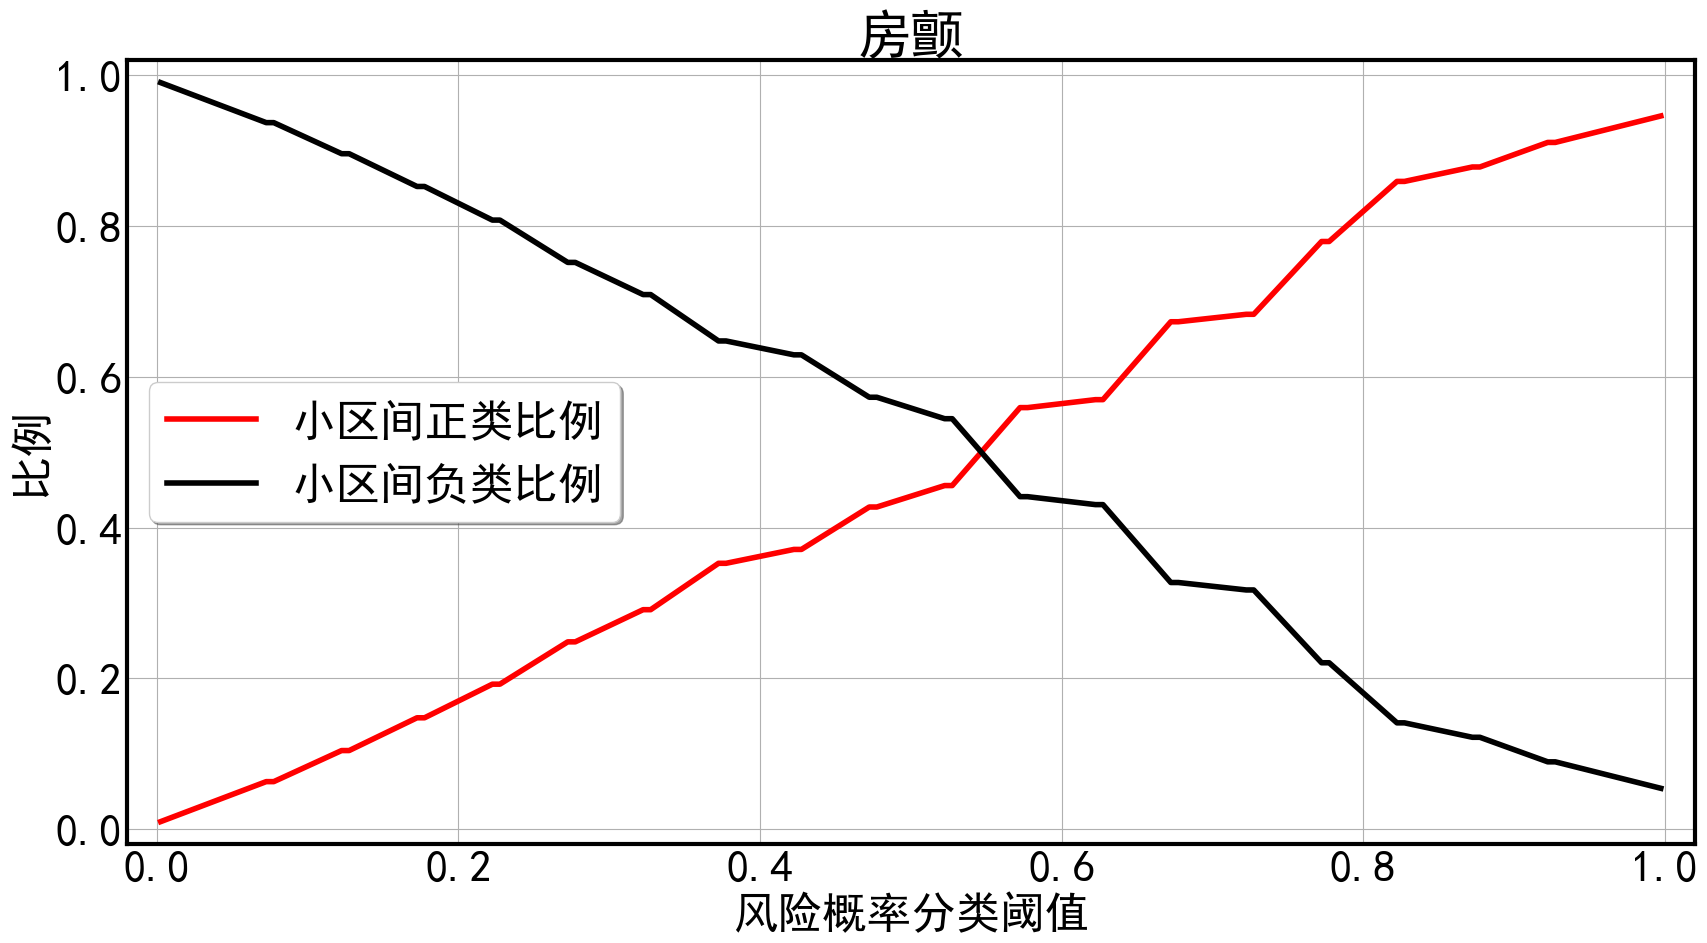

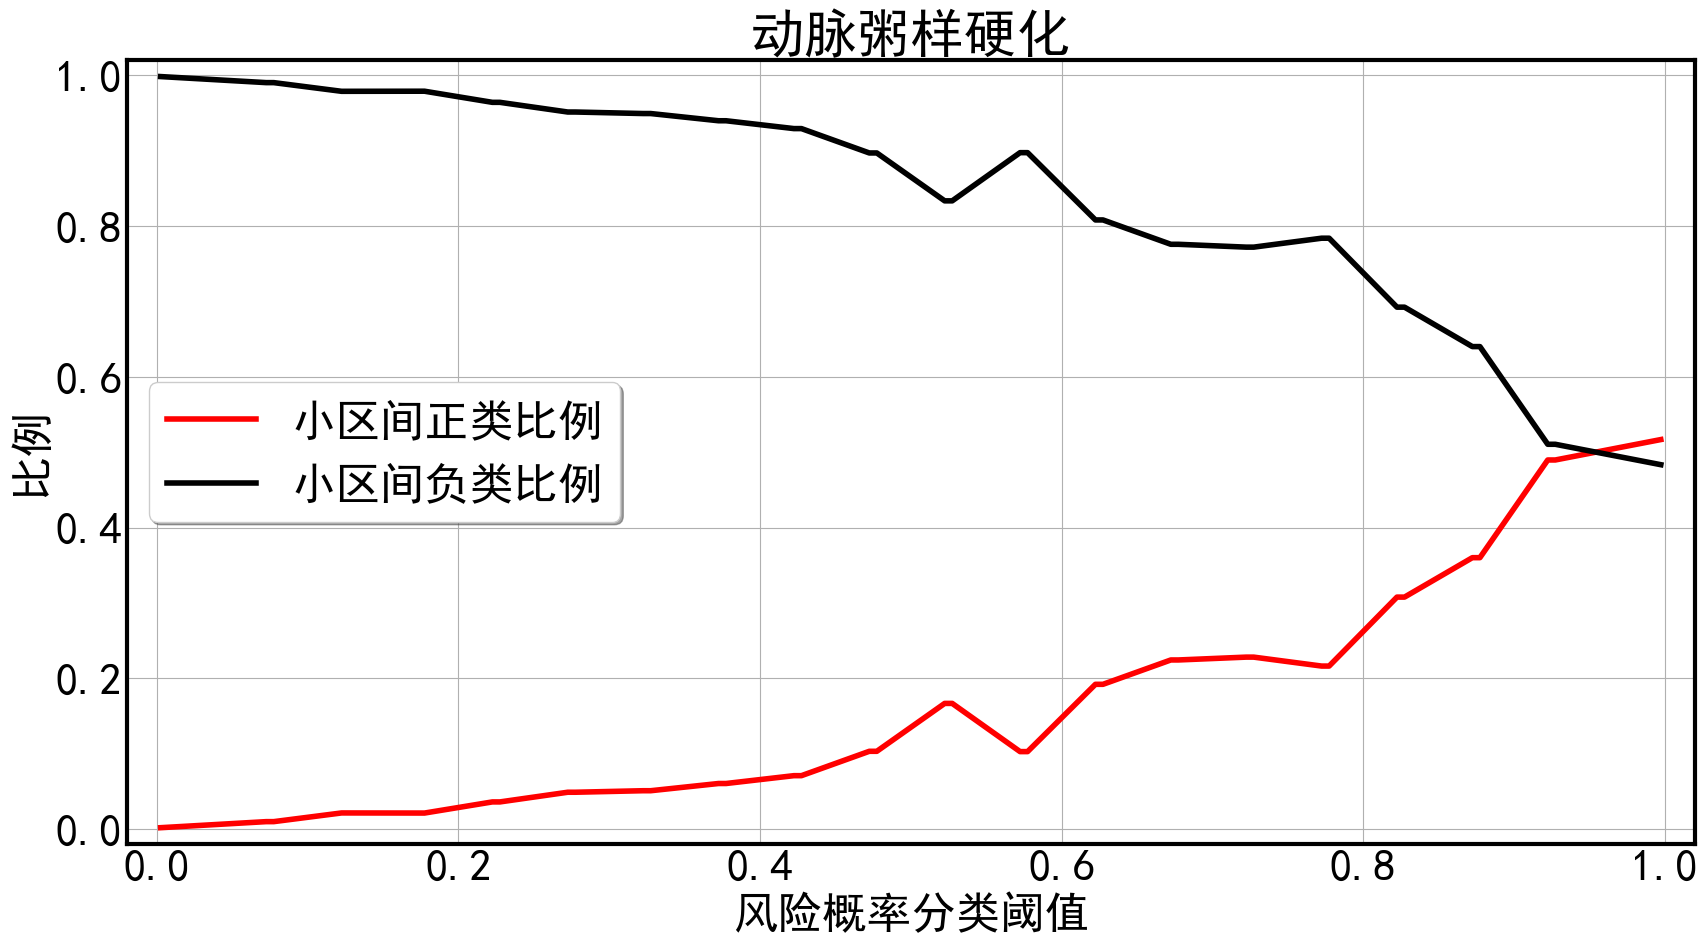

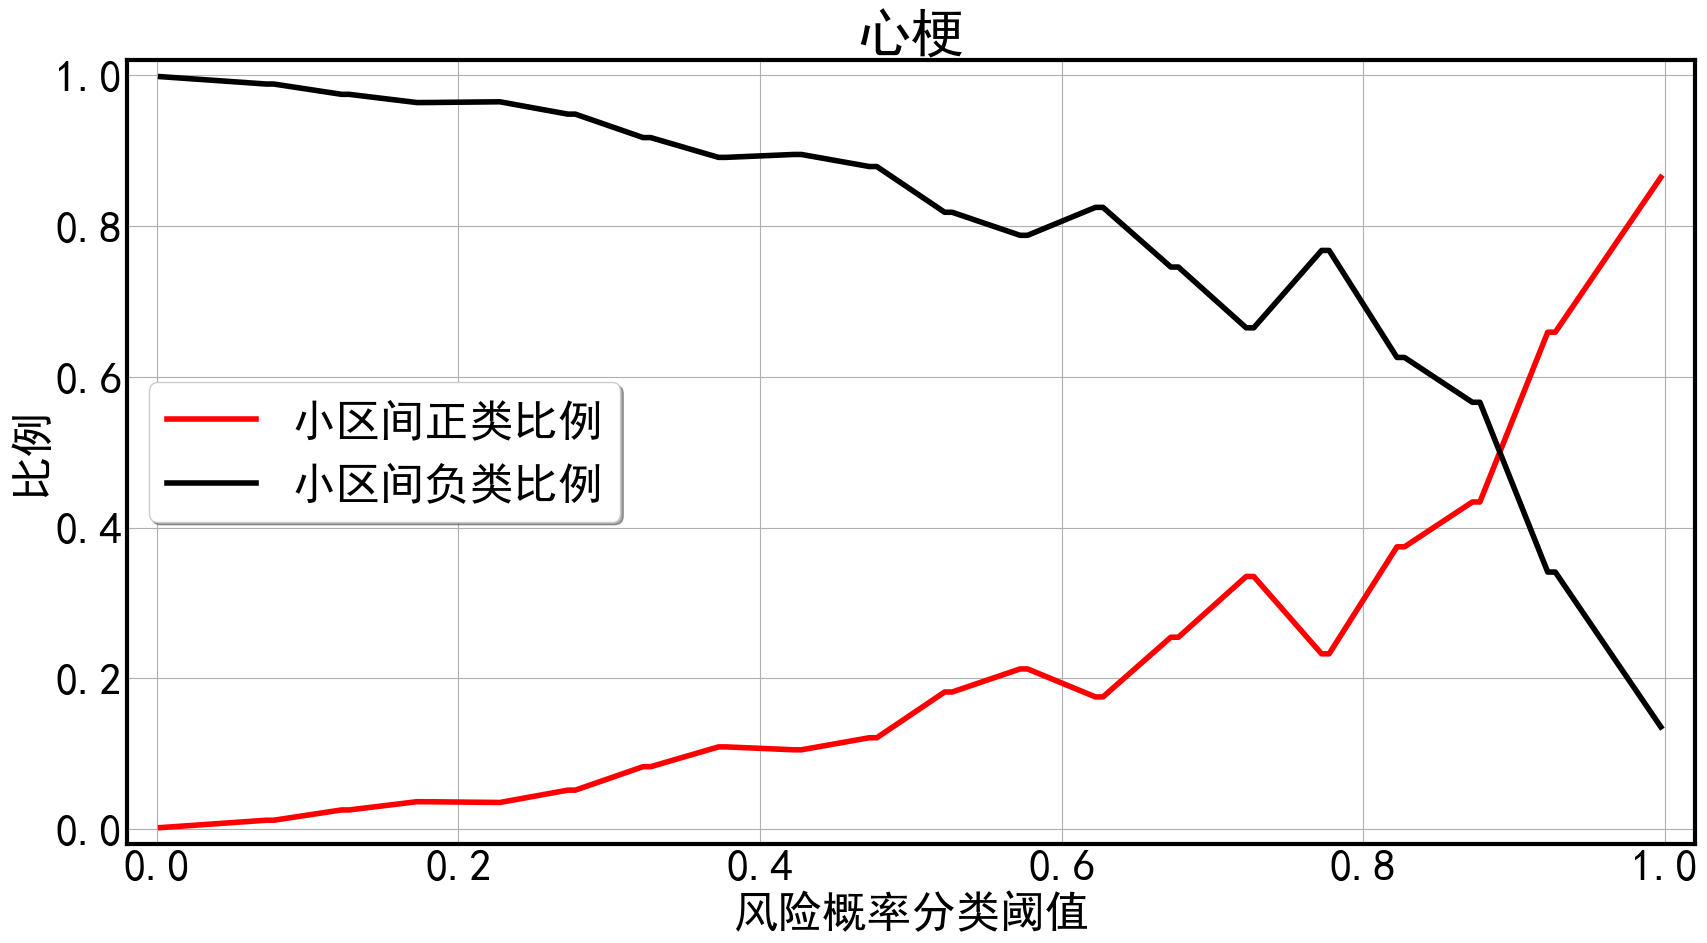

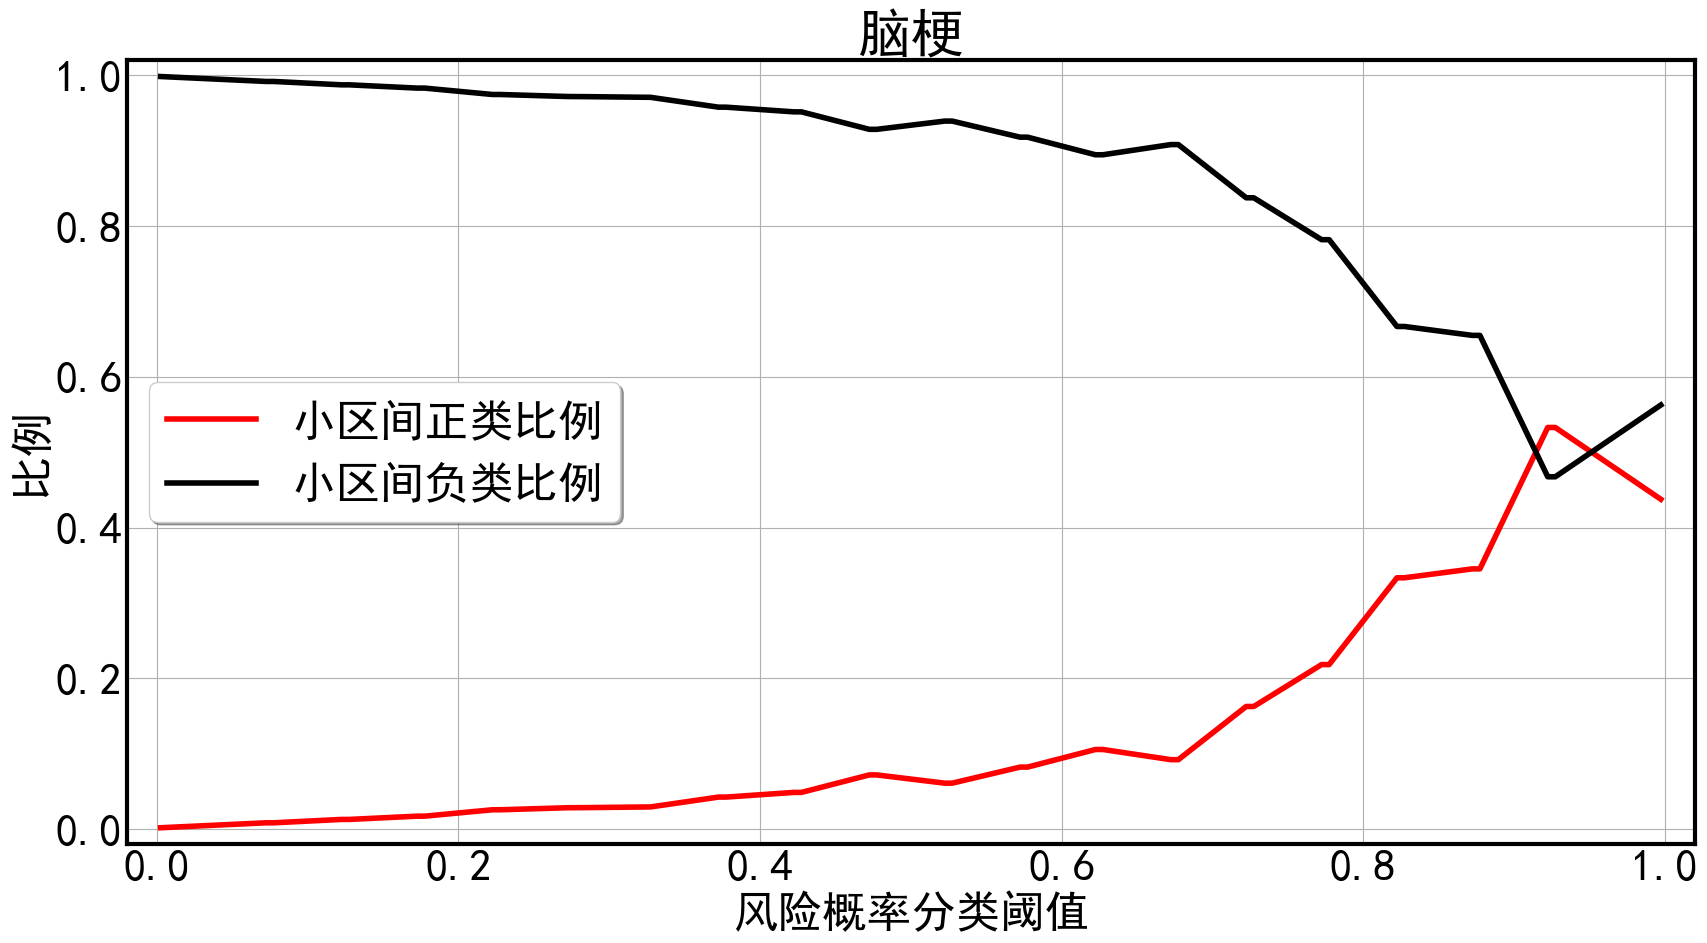

In [9]:
def do_work():
    for label_en, label_ch, legend_loc in zip(const.label_en_list, const.label_ch_list, const.legend_loc_list):
        create_statistical_coefficients_list(label_en, label_ch, legend_loc)
if __name__ == '__main__':
    do_work()